In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Suppress Warning message
import warnings
warnings.filterwarnings('ignore')

# Model Building Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.feature_selection import RFE

In [2]:
# Loading dataset
pd.set_option('display.max_columns', 100)
housing = pd.read_csv('train.csv')

# Data Inspection

In [3]:
# Having a glance at data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
# Checking data types of the columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking statatistics of the data
housing.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

<Figure size 576x360 with 0 Axes>

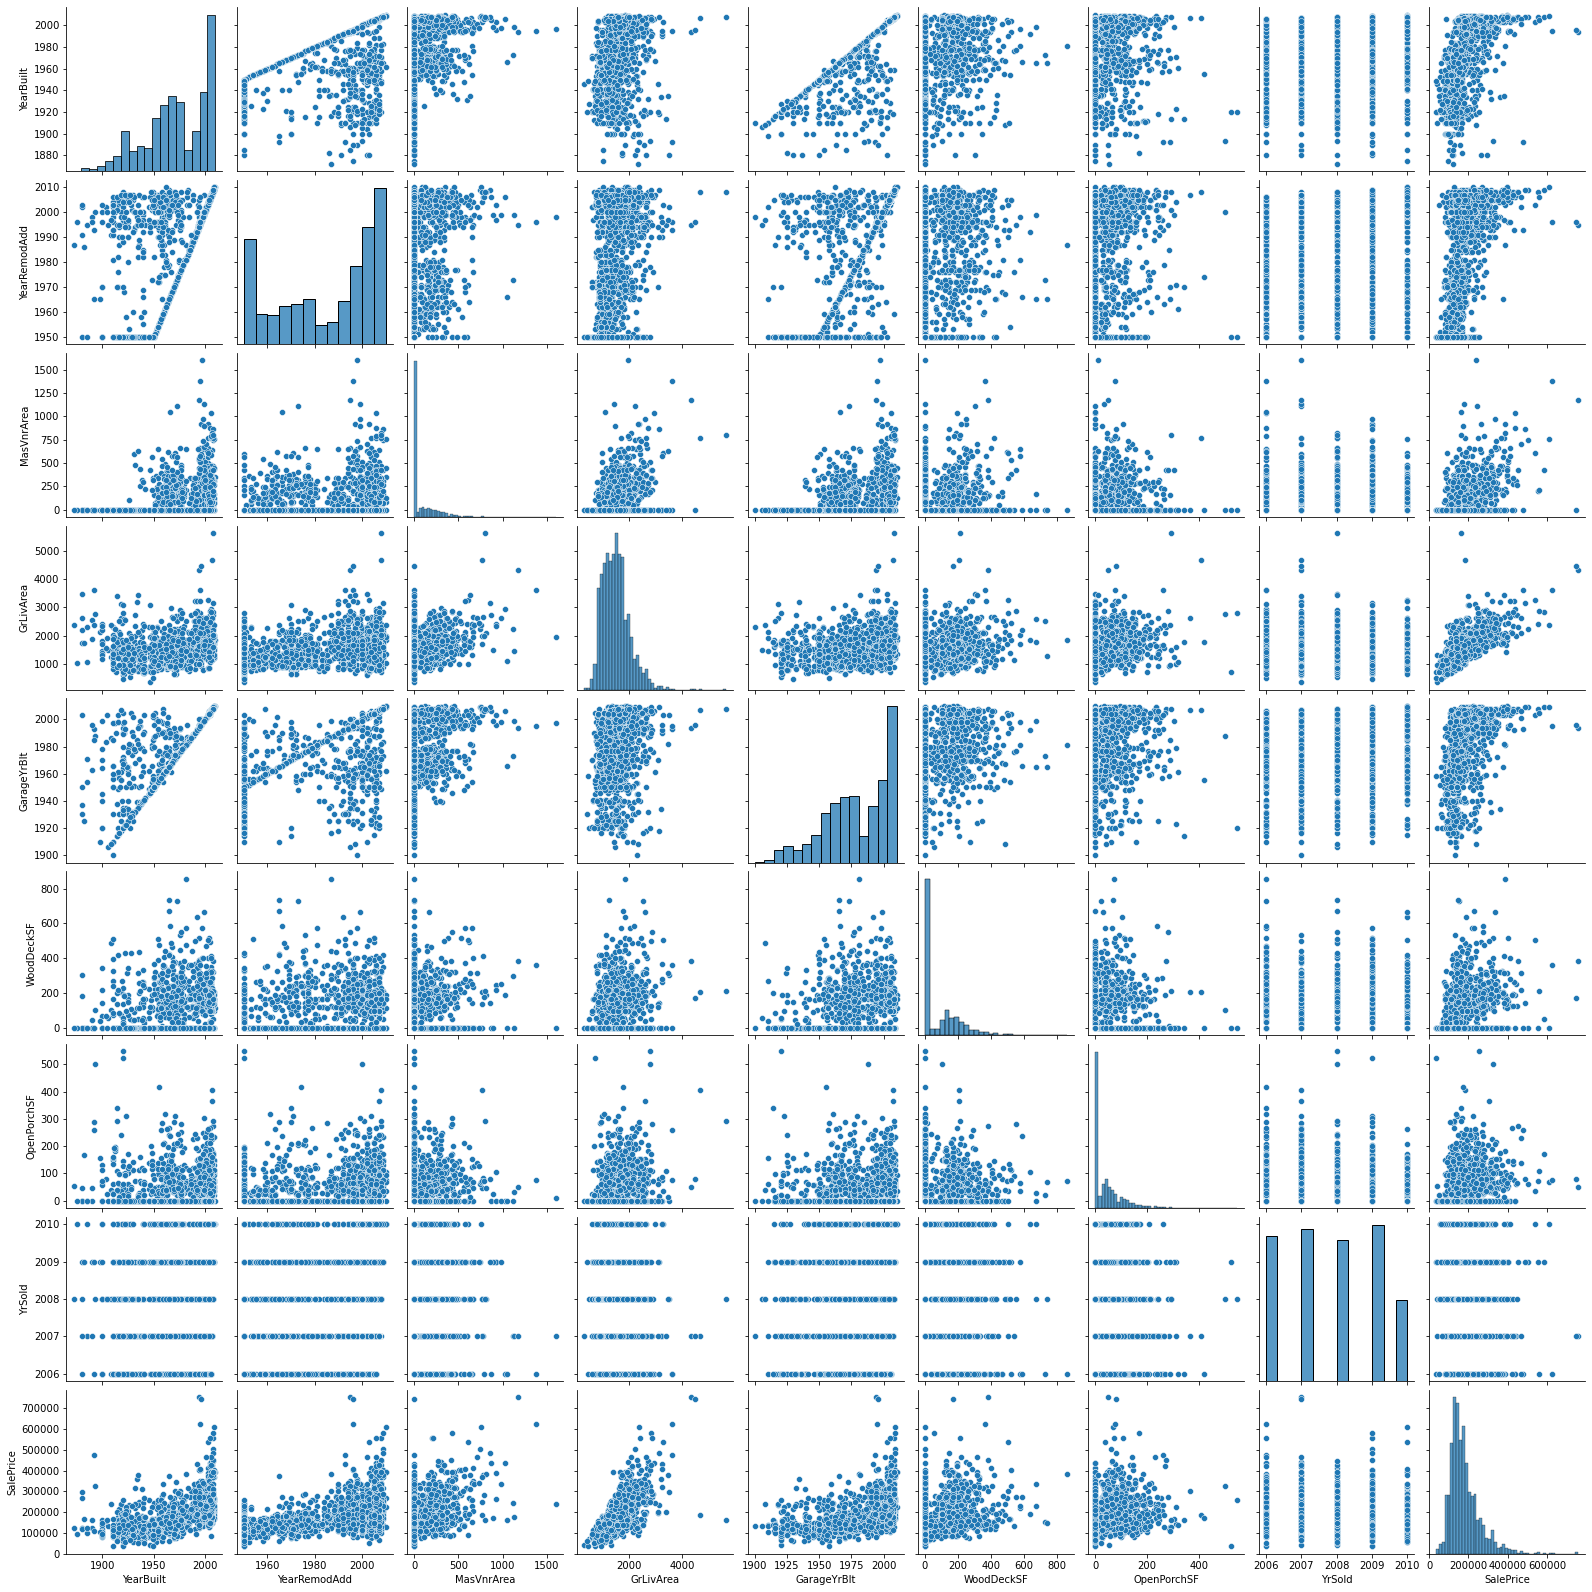

In [7]:
# Checking the few numerical features wheather they are linearlly correlated with target 
plt.figure(figsize=(8,5))
sns.pairplot(housing[['YearBuilt','YearRemodAdd','MasVnrArea','GrLivArea','GarageYrBlt','WoodDeckSF','OpenPorchSF','YrSold','SalePrice']])

Above plots clearly indicate that target "SalePrice" has some linear relationship with dependent columns like "GrLivArea","YearBuilt" and other but they have high variance

# Data Cleaning

#### Missing Values Treatment

In [8]:
# Chgecking missing
pd.set_option('display.max_rows',100)
housing.isnull().sum(axis=0)/len(housing)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

In [9]:
# Dropping the columns which has null values greater than and equal to 50%
dropped_gr_fifty = []
for i in housing.columns:
    if 100*housing[i].isnull().sum(axis=0)/len(housing) >= 50:
        dropped_gr_fifty.append(i)
        housing.drop(i, axis=1, inplace = True)
print('Dropped Columns are: ',dropped_gr_fifty)

Dropped Columns are:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [10]:
housing.shape

(1460, 77)

In [11]:
# Checking the skewness of the data of categorical data types
# Dropping highly skewed columns(If a particular category of a feature is more than and equal to 90%)
cat_features = housing.dtypes[housing.dtypes == 'object'].index
skewed_cols_dropped = []
for i in cat_features:
    if max(100*housing[i].value_counts(dropna=False)/len(housing)) >= 90:
        skewed_cols_dropped.append(i)
        housing.drop(i, axis=1, inplace = True)
print("Following columns are dropped ",skewed_cols_dropped)

Following columns are dropped  ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


In [12]:
# Replacing NA category of the following features with No_Bsmt as NA means No Basement
# BsmtQual
# BsmtCond
# BsmtExposure
# BsmtFinType1
# BsmtFinType2
housing[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]=housing[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].replace(np.NaN,'No_Bsmt')

In [13]:
# Checking categories in the following fields after replacement
print(housing.BsmtQual.value_counts(dropna=False))
print(housing.BsmtCond.value_counts(dropna=False))
print(housing.BsmtExposure.value_counts(dropna=False))
print(housing.BsmtFinType1.value_counts(dropna=False))
print(housing.BsmtFinType2.value_counts(dropna=False))

TA         649
Gd         618
Ex         121
No_Bsmt     37
Fa          35
Name: BsmtQual, dtype: int64
TA         1311
Gd           65
Fa           45
No_Bsmt      37
Po            2
Name: BsmtCond, dtype: int64
No         953
Av         221
Gd         134
Mn         114
No_Bsmt     38
Name: BsmtExposure, dtype: int64
Unf        430
GLQ        418
ALQ        220
BLQ        148
Rec        133
LwQ         74
No_Bsmt     37
Name: BsmtFinType1, dtype: int64
Unf        1256
Rec          54
LwQ          46
No_Bsmt      38
BLQ          33
ALQ          19
GLQ          14
Name: BsmtFinType2, dtype: int64


In [14]:
# Checking the GarageYrBlt vs GarageFinish whether both has same records with null values
len(housing[housing['GarageYrBlt'].isnull() & housing['GarageFinish'].isnull()])/len(housing)

0.05547945205479452

So, exactly same records of both of the fields have null

In [15]:
#Checking housing build years
#housing['GarageYrBlt'].quantile((.25,.5,.75,.90,.95))
# housing.groupby(by='GarageYrBlt')['GarageYrBlt'].count()
housing['GarageYrBlt'].value_counts(ascending=False).head()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
Name: GarageYrBlt, dtype: int64

Here most of the houses are build in 2005, so replacing null values with year 2005

In [16]:
# So replacing null values with years 2005
housing['GarageYrBlt']=housing['GarageYrBlt'].replace(np.nan, 2005)

In [17]:
# Replacing NA category of the following features with No_Grg as NA means No Garage
housing[['GarageQual','GarageType','GarageFinish']] = housing[['GarageQual','GarageType','GarageFinish']].replace(np.NaN, 'No_Grg')

In [18]:
# Checking categories in the following fields after replacement
print(housing.GarageQual.value_counts())
print(housing.GarageType.value_counts())
print(housing.GarageFinish.value_counts())

TA        1311
No_Grg      81
Fa          48
Gd          14
Ex           3
Po           3
Name: GarageQual, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
No_Grg      81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf       605
RFn       422
Fin       352
No_Grg     81
Name: GarageFinish, dtype: int64


In [19]:
# Checking values in MasVnrType
housing['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

Considering None as a value and replacing NaN with Mode of feature

In [20]:
# Replacing null values in MasVnrType with mode as only 8 records are missing
housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0], inplace=True)

In [21]:
# Checking values in MasVnrType
housing['MasVnrType'].value_counts(dropna=False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [22]:
# Checking data in FireplaceQual
housing['FireplaceQu'].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [23]:
# Replacing NaN with mode of the field "FireplaceQu" with No_FirePlc as It means there is no fire place in the property
housing['FireplaceQu']= housing['FireplaceQu'].replace(np.NaN, 'No_FirePlc')

In [24]:
# Checking data in FireplaceQual
housing['FireplaceQu'].value_counts(dropna=False)

No_FirePlc    690
Gd            380
TA            313
Fa             33
Ex             24
Po             20
Name: FireplaceQu, dtype: int64

In [25]:
# Checking data ditribution of LotFrontage
housing['LotFrontage'].quantile((.25,.50,.75,.95,.99))

0.25     59.0
0.50     69.0
0.75     80.0
0.95    107.0
0.99    141.0
Name: LotFrontage, dtype: float64

In [26]:
# Checkig mean of the field 'LotFrontage'
housing['LotFrontage'].mean()

70.04995836802665

In [27]:
# Null values can be replaced with either mean or median
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)

In [28]:
# Checking distribution of the values in the field
housing['MasVnrArea'].quantile((.25,.5,.75,.90,.99))

0.25      0.00
0.50      0.00
0.75    166.00
0.90    335.00
0.99    791.92
Name: MasVnrArea, dtype: float64

In [29]:
# There are very few values missing so filling it with mean
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean(), inplace=True)

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

# EDA

### Univariate Analysis

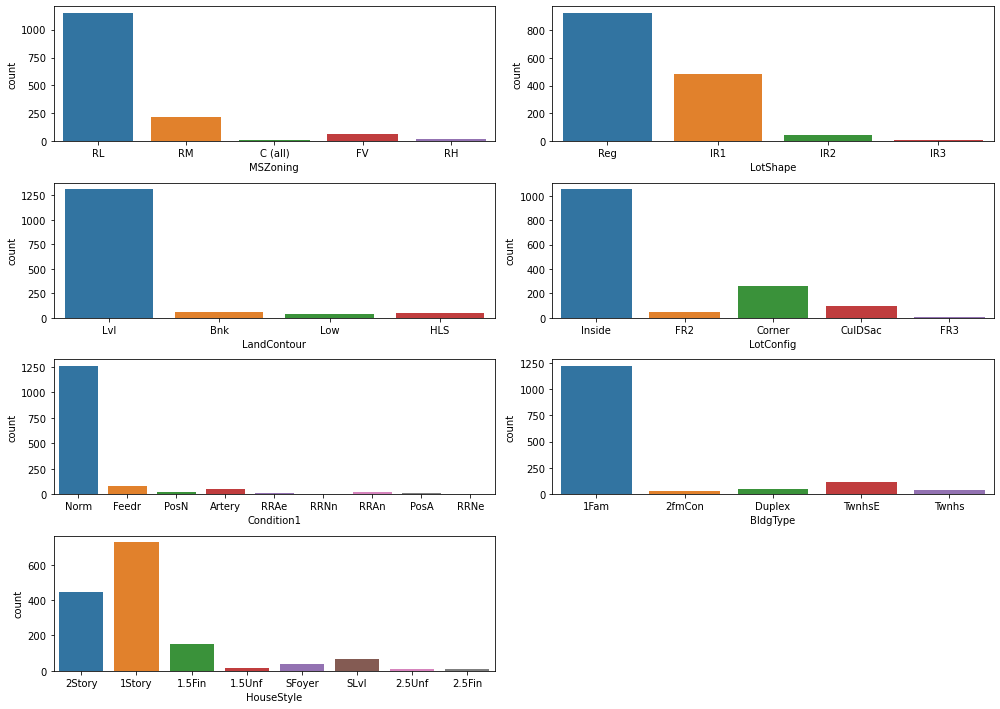

In [31]:
# Categorical Univariate analysis
cat_vars =['MSZoning','LotShape','LandContour','LotConfig','Condition1','BldgType','HouseStyle']
plt.figure(figsize=(14,10))
for i,j in enumerate(cat_vars):
    plt.subplot(4,2,i+1)
    sns.countplot(x=j,data=housing)
    plt.tight_layout()
plt.show()

- Most of the people lives in "Residential Low Density"
- Most of the houses have "General shape of property"
- Mostly the Flatness of the property is "Near Flat/Level"
- Condition of the mostly houses are Normal
- Type of dwelling moslty are "Single-family Detached"
- Style of dwelling mostly are One story and Two stories

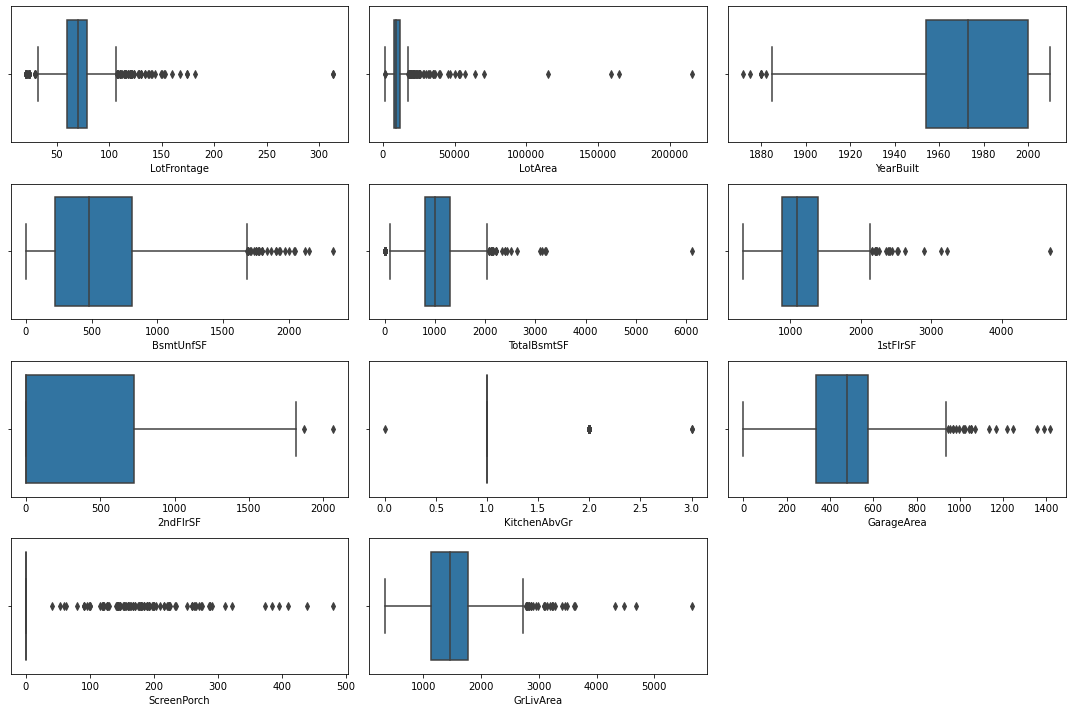

In [32]:
# Univariate numerical variable analysis
num_vars = ['LotFrontage','LotArea','YearBuilt','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','KitchenAbvGr','GarageArea','ScreenPorch','GrLivArea']
rows = len(num_vars)/3
plt.figure(figsize=(15,10))
for i, j in enumerate(num_vars):
    plt.subplot(rows+1,3,i+1)
    sns.boxplot(x=j, data=housing)
    plt.tight_layout()
plt.show()

- Outliers exists in almost all of the features
- Most of houses are built before 1980.
- Most of the houses has not screenporch.
- Almost all the features have outliers but I thought not cap and bin the data as these observations might point out to higher price and lower price category of the houses

# Bivariate Analysis Numerical Analysis

In [33]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No_FirePlc,Attchd,2003.0,RFn,2,548,TA,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


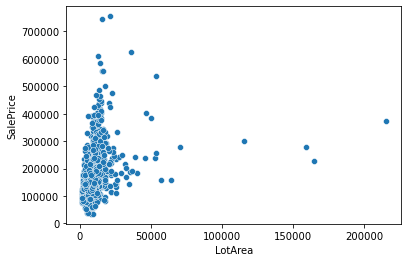

In [34]:
# Checking relationship between 'LotArea' and 'SalePrice'
sns.scatterplot('LotArea','SalePrice', data=housing)
plt.show()

There are outliers and also they are not well correlated.Most of the lot area size are 25000

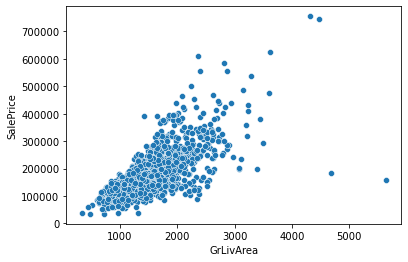

In [35]:
# Checking relationship between 'GrLivArea' and 'SalePrice'
sns.scatterplot('GrLivArea','SalePrice', data=housing)
plt.show()

Here GrLivArea is correlated but as the living area increase price is going down as well higher too

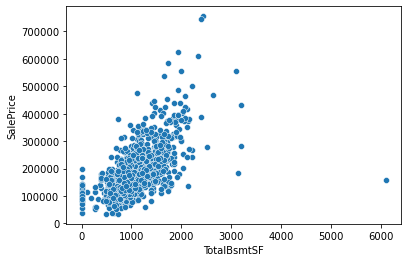

In [36]:
# Checking relationship between 'GrLivArea' and 'SalePrice'
sns.scatterplot('TotalBsmtSF','SalePrice', data=housing)
plt.show()

Here too data seems to be correlated but has higher variance too

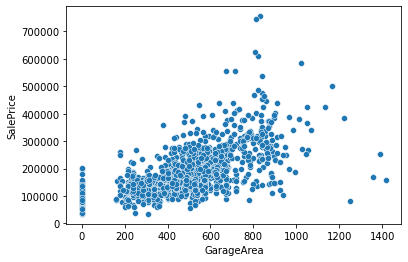

In [37]:
# Checking relationship between 'GrLivArea' and 'SalePrice'
sns.scatterplot('GarageArea','SalePrice', data=housing)
plt.show()

Here too data seems to be correlated but has higher variance too

# Bivariate Analysis Categorical Analysis

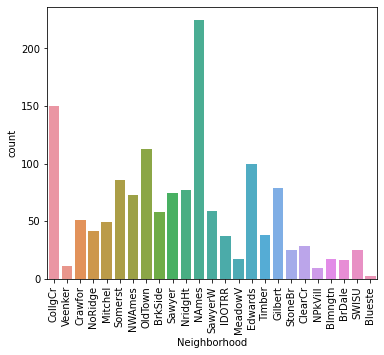

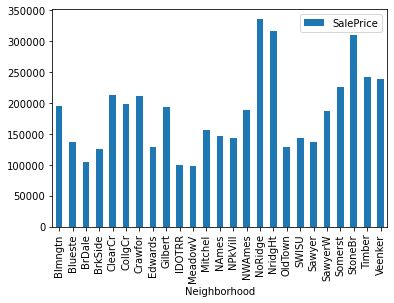

In [38]:
# Checking average figure in each category in neighborhood
# I plotted countplot as well for analysis
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.countplot(housing['Neighborhood'])
plt.xticks(rotation=90)
housing[['Neighborhood','SalePrice']].groupby(by='Neighborhood').mean().plot.bar()
plt.show()

Average cost of property is higher in NoRidge but NAmes has more property

# Multivariate Analysis

In [39]:
# Dropping ID columns as it is not required any more
housing.drop('Id', axis=1, inplace=True)

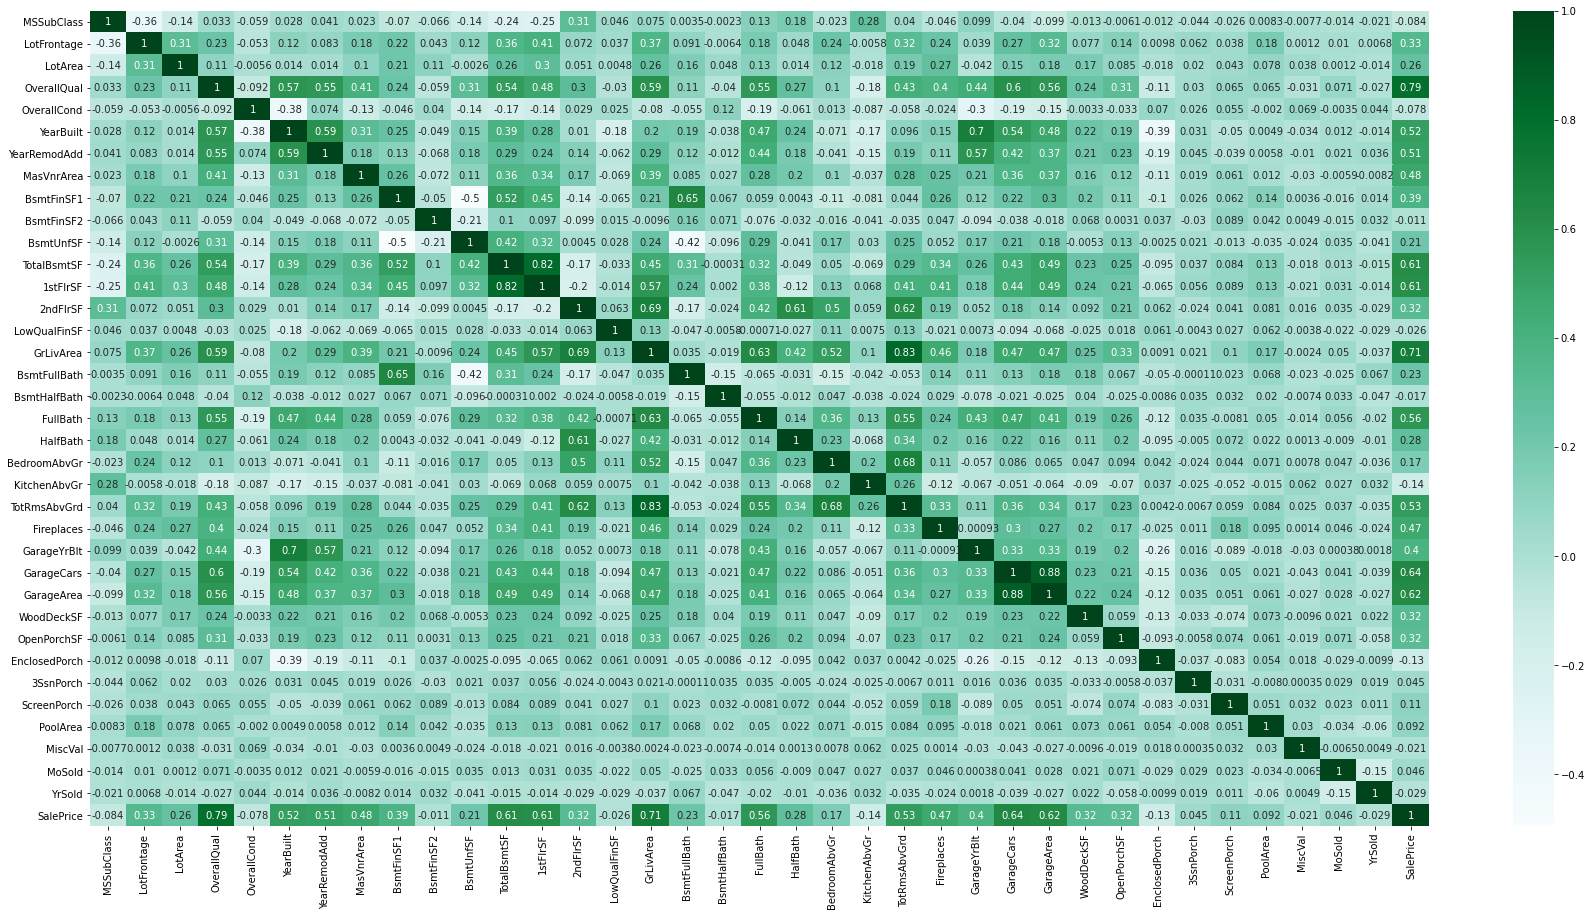

In [40]:
# Creating heatmap
plt.figure(figsize = (30,15))
sns.heatmap(housing.corr(), annot=True, cmap='BuGn')
plt.show()

- SalePrice is highly correlated with features "OverallQual", "GrLivArea","GarageCars"
- GarageArea  and GarageCars are highly related so dropping GarageCars
- YearBuilt and GarageYrBuilt are highly related so dropping GarageYrBuilt

In [41]:
# Dropping 'GarageCars','GarageYrBlt'
housing.drop(['GarageCars','GarageYrBlt'], axis=1, inplace=True)

In [42]:
housing.shape

(1460, 63)

In [43]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

In [44]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No_FirePlc,Attchd,RFn,548,TA,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,RFn,460,TA,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,RFn,608,TA,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,Unf,642,TA,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,RFn,836,TA,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Data Preparation

#### Encoding Ordinal Categories

In [45]:
# Mapping below mentioned ordinal categories into numeric values
bsmt_qual_cond_map = {'No_Bsmt':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
housing['BsmtQual'] = housing['BsmtQual'].map(bsmt_qual_cond_map)
housing['BsmtCond'] = housing['BsmtCond'].map(bsmt_qual_cond_map)

In [46]:
# Checking category in the field BsmtFinType1
housing['BsmtFinType1'].value_counts()

Unf        430
GLQ        418
ALQ        220
BLQ        148
Rec        133
LwQ         74
No_Bsmt     37
Name: BsmtFinType1, dtype: int64

In [47]:
# Mapping below mentioned ordinal categories into numeric values
bsmtFinType_map = {'No_Bsmt':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}

housing['BsmtFinType1'] = housing['BsmtFinType1'].map(bsmtFinType_map)
housing['BsmtFinType2'] = housing['BsmtFinType2'].map(bsmtFinType_map)

In [48]:
housing['BsmtFinType1'].value_counts()

1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [49]:
# Mapping below mentioned ordinal categories into numeric values
ext_qual_cond_map = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
housing['ExterQual'] = housing['ExterQual'].map(ext_qual_cond_map)
housing['ExterCond'] = housing['ExterCond'].map(ext_qual_cond_map)

In [50]:
# Mapping below mentioned ordinal categories into numeric values
kch_qual_cond_map = {'Fa':1,'TA':2,'Gd':3,'Ex':4}
housing['KitchenQual'] = housing['KitchenQual'].map(kch_qual_cond_map)

In [51]:
# Mapping below mentioned ordinal categories into numeric values
grg_qual_cond_map = {'No_Grg':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
housing['GarageQual']=housing['GarageQual'].map(grg_qual_cond_map)

In [52]:
# Mapping below mentioned ordinal categories into numeric values
BsmtFinType_map = {'No_Grg':0,'Unf':1,'RFn':2,'Fin':3}
housing['GarageFinish']=housing['GarageFinish'].map(BsmtFinType_map)

In [53]:
# Mapping below mentioned ordinal categories into numeric values
bsmt_exp_map = {'No_Bsmt':0,'No':1,'Mn':2,'Av':3,'Gd':4} 
housing['BsmtExposure'] = housing['BsmtExposure'].map(bsmt_exp_map)

In [54]:
# Mapping below ordinal categories into numeric values
fire_qual_cond_map = {'No_FirePlc':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
housing['FireplaceQu'] = housing['FireplaceQu'].map(fire_qual_cond_map)

In [55]:
# Mapping below mentioned ordinal categories into numeric values
heat_qual_cond_map = {'No_FirePlc':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
housing['HeatingQC'] = housing['HeatingQC'].map(heat_qual_cond_map)

In [56]:
# Using LabelEncoder for Neighborhood column. I do not want to dummifies it as it will create too many feature for each category
housing['Neighborhood'] = LabelEncoder().fit_transform(housing['Neighborhood'])

In [57]:
# Finding age of following YrSold YearBuilt YearRemodAdd
current_yrs = datetime.datetime.now().year
housing['YrSold_age'] = current_yrs - housing['YrSold']
housing['YearBuilt_age'] = current_yrs - housing['YearBuilt']
housing['YearRemodAdd_age'] = current_yrs - housing['YearRemodAdd']

# Dropping the orginal columns YrSold YearBuilt YearRemodAdd
housing.drop(['YrSold','YearBuilt','YearRemodAdd'], axis=1, inplace=True)

In [58]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YrSold_age,YearBuilt_age,YearRemodAdd_age
0,60,RL,65.0,8450,Reg,Lvl,Inside,5,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,Attchd,2,548,3,0,61,0,0,0,0,0,2,WD,Normal,208500,12,17,17
1,20,RL,80.0,9600,Reg,Lvl,FR2,24,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,Attchd,2,460,3,298,0,0,0,0,0,0,5,WD,Normal,181500,13,44,44
2,60,RL,68.0,11250,IR1,Lvl,Inside,5,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,Attchd,2,608,3,0,42,0,0,0,0,0,9,WD,Normal,223500,12,19,18
3,70,RL,60.0,9550,IR1,Lvl,Corner,6,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,3,7,1,4,Detchd,1,642,3,0,35,272,0,0,0,0,2,WD,Abnorml,140000,14,105,50
4,60,RL,84.0,14260,IR1,Lvl,FR2,15,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,3,Attchd,2,836,3,192,84,0,0,0,0,0,12,WD,Normal,250000,12,20,20


Categorical field "MSSubClass" already have numerical values. It seems to be in order then I want it to be as it is

In [59]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1460 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   LotShape          1460 non-null   object 
 5   LandContour       1460 non-null   object 
 6   LotConfig         1460 non-null   object 
 7   Neighborhood      1460 non-null   int32  
 8   Condition1        1460 non-null   object 
 9   BldgType          1460 non-null   object 
 10  HouseStyle        1460 non-null   object 
 11  OverallQual       1460 non-null   int64  
 12  OverallCond       1460 non-null   int64  
 13  RoofStyle         1460 non-null   object 
 14  Exterior1st       1460 non-null   object 
 15  Exterior2nd       1460 non-null   object 
 16  MasVnrType        1460 non-null   object 


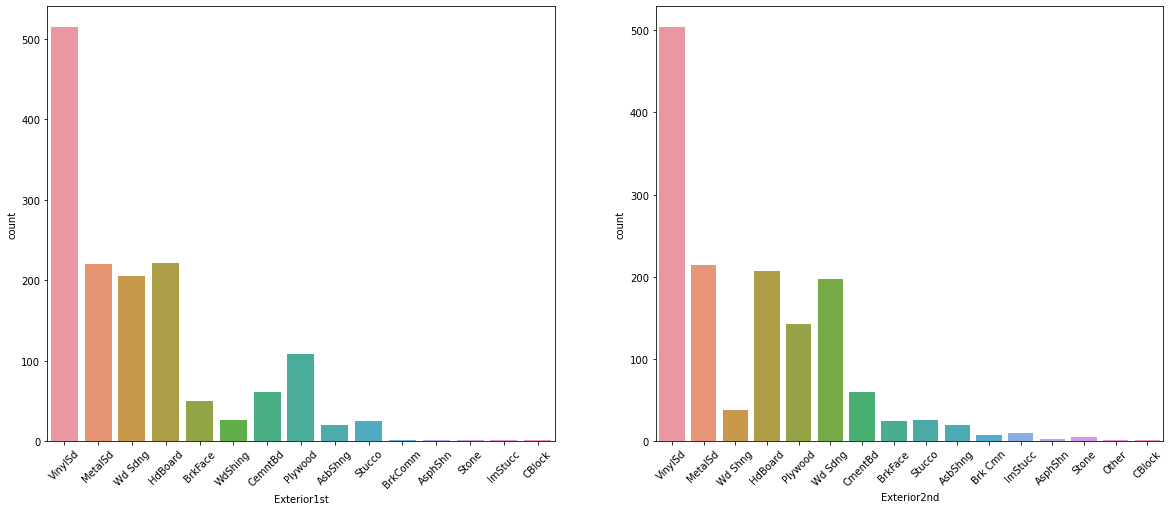

In [60]:
# Comparing data in Exterior1st' and 'Exterior2nd'
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Exterior1st',data=housing)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(x='Exterior2nd',data=housing)
plt.xticks(rotation=45)
plt.show()

In [61]:
len(housing[housing['Exterior1st'] == housing['Exterior2nd']])/len(housing)

0.8527397260273972

By looking exterior covering material on houses in above graph, there are similarities but little dissimilarties in the pattern. Almost 85% records has same values so dropping 'Exterior2nd'

In [62]:
housing.drop('Exterior2nd', axis=1, inplace=True)

In [63]:
housing.isnull().sum(axis=0)

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
Exterior1st         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
FireplaceQu         0
GarageType          0
GarageFini

#### Dummifying variables

In [64]:
# Creating copy of the dataset
house = housing.copy()

In [65]:
# List of all the variables that need to be dummified
dum_vars = house.select_dtypes(include='object').columns
vars_tobe_scaled = house.drop('SalePrice',axis=1).select_dtypes(exclude='object').columns
print("Columns to be dummified are ",dum_vars)
print("Columns to be scaled are ",vars_tobe_scaled)

Columns to be dummified are  Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'Foundation', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')
Columns to be scaled are  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold_age', 'YearBu

In [66]:
for i in dum_vars:
    j = 'df_'+i
    j = pd.get_dummies(house[i],prefix=i, drop_first=True)
    house = pd.concat([house,j], axis=1)
    house.drop(i, axis=1, inplace=True)
house.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YrSold_age,YearBuilt_age,YearRemodAdd_age,MSZoning_FV,MSZoning_RH,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Grg,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,5,7,5,196.0,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2,548,3,0,61,0,0,0,0,0,2,208500,12,17,17,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,24,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,2,6,1,3,2,460,3,298,0,0,0,0,0,0,5,181500,13,44,44,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,5,7,5,162.0,4,3,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,3,6,1,3,2,608,3,0,42,0,0,0,0,0,9,223500,12,19,18,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,6,7,5,0.0,3,3,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,3,7,1,4,1,642,3,0,35,272,0,0,0,0,2,140000,14,105,50,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,15,8,5,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,3,2,836,3,192,84,0,0,0,0,0,12,250000,12,20,20,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Transformation of target variable

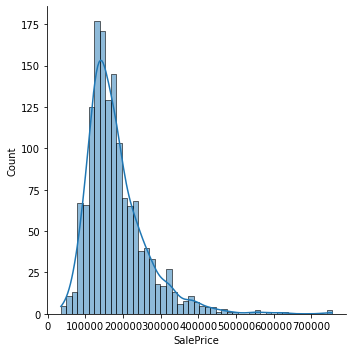

In [67]:
# Checking distribution of target variables
sns.displot(house['SalePrice'], kde=True)
plt.show()

Target variable is not normally distributed

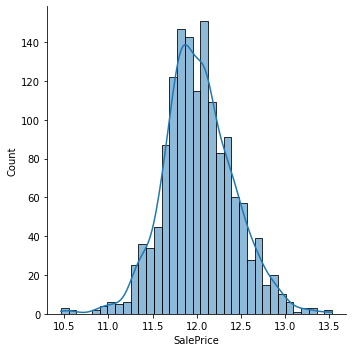

In [68]:
# Transforming the variable to make it normally distributed
# Checking by log transformation
log_SalePrice = np.log1p(house["SalePrice"])
sns.displot(log_SalePrice, kde=True)
plt.show()

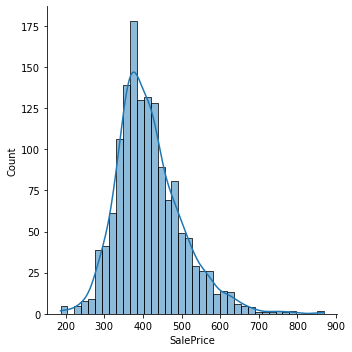

In [69]:
# Checking by square root transformation
sqrt_SalePrice = house["SalePrice"]**(1/2)
sns.displot(sqrt_SalePrice, kde=True)
plt.show()

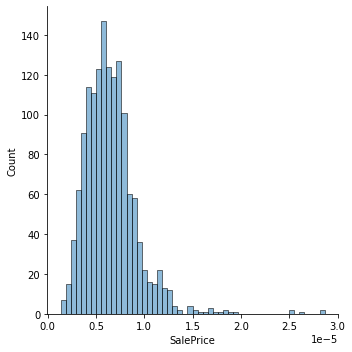

In [70]:
# Checking by reciprocal transformation
recp_SalePrice = 1/house["SalePrice"]
sns.displot(recp_SalePrice, kde=True)
plt.show()

After looking at all the three transformations, log transformation is giving the best result, so going with the same

In [71]:
# # Transforming the target variable for normlity in dataset
housing['SalePrice'] = np.log1p(house["SalePrice"])
housing['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Train Test Split

In [72]:
# x and y variables
y = house.pop('SalePrice')
x=house

In [73]:
# train test split
x_train, x_test, y_train, y_test =  train_test_split(x,y,train_size=.7,random_state=1)

In [74]:
print(x_train.shape)
print(x_test.shape)

(1021, 126)
(439, 126)


### ReScaling

In [75]:
# Checking the data before scaling
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',200)
x_train.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold_age,YearBuilt_age,YearRemodAdd_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Grg,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
208,60,70.049958,14364,20,7,5,128.0,4,3,4,3,4,6,1065,1,0,92,1157,5,1180,882,0,2062,1,0,2,1,3,1,2,7,1,4,3,454,3,60,55,0,0,154,0,0,4,13,32,31,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
83,20,80.000000,8892,12,5,5,66.0,3,3,3,3,1,1,0,1,0,1065,1065,4,1065,0,0,1065,0,0,1,1,3,1,2,6,0,0,1,461,3,74,0,0,0,0,0,0,7,13,60,60,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1174,70,80.000000,16560,6,6,8,0.0,3,3,4,3,1,3,503,1,0,449,952,3,1170,1175,0,2345,0,0,2,1,4,1,2,9,1,4,1,360,3,0,0,0,0,0,0,0,7,14,88,70,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
250,30,55.000000,5350,3,3,2,0.0,3,1,3,3,1,1,0,1,0,728,728,5,1306,0,0,1306,0,0,1,0,3,1,1,6,0,0,0,0,0,263,0,0,0,0,0,450,5,10,80,54,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
895,60,71.000000,7056,12,6,5,415.0,3,3,3,3,1,4,400,1,0,380,780,3,983,813,0,1796,1,0,1,1,4,1,2,8,1,3,2,483,3,0,50,0,0,0,0,0,10,12,57,57,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


First 42 columns should be scaled

In [76]:
# Scaling  and transforming the x_train data
scaler = StandardScaler()
x_train[vars_tobe_scaled] = scaler.fit_transform(x_train[vars_tobe_scaled])

In [77]:
# Scaling the x_test data
x_test[vars_tobe_scaled] = scaler.transform(x_test[vars_tobe_scaled])

In [78]:
# fitted and trasformed data
x_train.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold_age,YearBuilt_age,YearRemodAdd_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Grg,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
208,0.080692,-0.008586,0.355082,1.307795,0.644398,-0.555700,0.158530,1.044654,-0.260541,0.586399,0.12775,2.170105,1.136654,1.326250,-0.262844,-0.277716,-1.075628,0.215782,0.864941,0.023670,1.235713,-0.11567,1.021786,1.078100,-0.241048,0.812423,1.267129,0.135851,-0.204771,-0.797333,0.280988,0.585191,1.192905,1.458198,-0.091755,0.243989,-0.288647,0.127629,-0.360244,-0.113768,2.397258,-0.061799,-0.090372,-0.848516,0.632931,-0.549855,-0.172567,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
83,-0.874517,0.424544,-0.168998,-0.022144,-0.830783,-0.555700,-0.200207,-0.718308,-0.260541,-0.558368,0.12775,-0.605274,-1.228865,-0.972931,-0.262844,-0.277716,1.142497,0.010497,-0.178918,-0.269499,-0.792192,-0.11567,-0.860626,-0.853023,-0.241048,-1.047406,1.267129,0.135851,-0.204771,-0.797333,-0.333335,-0.950747,-1.009547,-0.841138,-0.058224,0.243989,-0.176123,-0.699303,-0.360244,-0.113768,-0.286400,-0.061799,-0.090372,0.272711,0.632931,0.381546,1.239686,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1174,0.319495,0.424544,0.565403,-1.019598,-0.093192,2.108006,-0.582089,-0.718308,-0.260541,0.586399,0.12775,-0.605274,-0.282658,0.112973,-0.262844,-0.277716,-0.261783,-0.241647,-1.222777,-0.001823,1.909382,-0.11567,1.556111,-0.853023,-0.241048,0.812423,1.267129,1.374274,-0.204771,-0.797333,1.509636,0.585191,1.192905,-0.841138,-0.542035,0.243989,-0.770893,-0.699303,-0.360244,-0.113768,-0.286400,-0.061799,-0.090372,0.272711,1.386983,1.312947,1.726670,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
250,-0.635715,-0.663717,-0.508232,-1.518325,-2.305964,-3.219406,-0.582089,-0.718308,-5.802460,-0.558368,0.12775,-0.605274,-1.228865,-0.972931,-0.262844,-0.277716,0.374246,-0.741473,0.864941,0.344881,-0.792192,-0.11567,-0.405600,-0.853023,-0.241048,-1.047406,-0.757501,0.135851,-0.204771,-2.316134,-0.33333

In [79]:
# trasformed data only
x_test.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold_age,YearBuilt_age,YearRemodAdd_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Grg,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
258,0.080692,0.424544,0.170332,-1.185840,0.644398,-0.555700,0.413118,1.044654,-0.260541,0.586399,0.12775,-0.605274,1.136654,-0.193584,-0.262844,-0.277716,0.087007,-0.217102,0.864941,-0.529527,1.113854,-0.115670,0.512005,-0.853023,-0.241048,0.812423,1.267129,0.135851,-0.204771,0.721467,0.280988,0.585191,0.642292,0.308530,0.435168,0.243989,-0.770893,0.744070,-0.360244,7.898179,-0.2864,-0.061799,-0.090372,-0.474774,-0.121121,-0.982291,-0.756947,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
267,0.438896,-0.446065,-0.216119,0.975310,-0.830783,2.108006,-0.582089,-0.718308,-0.260541,-0.558368,0.12775,-0.605274,-0.755761,-0.156884,-0.262844,-0.277716,-0.505709,-0.759324,0.864941,-0.302640,0.863240,8.626266,1.267236,-0.853023,-0.241048,0.812423,1.267129,1.374274,-0.204771,0.721467,0.895312,0.585191,1.192905,-0.841138,-1.116861,0.243989,1.334914,-0.338460,-0.360244,-0.113768,-0.2864,-0.061799,-0.090372,0.272711,-0.121121,1.080097,-0.562154,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
288,-0.874517,-0.008586,-0.080214,1.141552,-0.830783,-0.555700,-0.402720,-0.718308,2.510419,-0.558368,0.12775,-0.605274,0.190446,-0.001446,-0.262844,-0.277716,-0.300538,-0.397843,-1.222777,-0.690133,-0.792192,-0.115670,-1.172159,-0.853023,-0.241048,-1.047406,-0.757501,0.135851,-0.204771,-0.797333,-0.947659,-0.950747,-1.009547,-0.841138,-0.925252,0.243989,-0.770893,-0.699303,-0.360244,-0.113768,-0.2864,-0.061799,-0.090372,-1.596001,-1.629224,0.148696,0.898798,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
649,2.946322,-2.143752,-0.835207,-0.354629,-1.568373,0.332202,-0.582089,-0.718308,-0.260541,0.586399,0.12775,1.244979,0.190446,-0.690121,5.447032,2.748557,-1.285358,-0.960147,-0.178918,-1.378442,-0.792192,-0.115670,-1.681939,1.078100,-0.241048,-1.047406,-0.757501,-2.340996,-0.204771,-0.797333,-2.1763

In [80]:
x_train.isnull().sum(axis=0)

MSSubClass               0
LotFrontage              0
LotArea                  0
Neighborhood             0
OverallQual              0
OverallCond              0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
TotRmsAbvGrd             0
Fireplaces               0
FireplaceQu              0
GarageFinish             0
GarageArea               0
GarageQual               0
WoodDeckSF               0
O

# Model Building

### RFE

In [81]:
# Doing RFE to select 25 features
lr = LinearRegression()
rfe = RFE(lr,25)
rfe_x_train = rfe.fit(x_train, y_train)

In [82]:
cols=x_train.columns[rfe_x_train.support_]
cols

Index(['OverallQual', 'ExterQual', 'BsmtExposure', 'GrLivArea', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'LotShape_IR2', 'LotShape_IR3',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'RoofStyle_Gambrel',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_ImStucc', 'Foundation_Stone', 'Foundation_Wood',
       'SaleType_Con', 'SaleType_New', 'SaleCondition_Alloca',
       'SaleCondition_Partial'],
      dtype='object')

### Lasso and Ridge Regression

In [83]:
# list of alphas to tune
x_train = x_train[cols]
params = {'alpha': [.00006,.00007,0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,100,200,300,400]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [6e-05, 7e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 200, 300, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Creating dataframe of cv result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002194,0.002705,0.004531,0.005840,6e-05,{'alpha': 6e-05},-23944.484870,-22268.536421,-27074.528587,-23574.684764,-22790.876209,-23930.622170,1677.651994,28,-22439.482924,-23171.461151,-21724.006184,-23279.705628,-23385.309327,-22799.993043,632.206159
1,0.010093,0.006600,0.000000,0.000000,7e-05,{'alpha': 7e-05},-23944.482050,-22268.526794,-27074.527627,-23574.681663,-22790.872319,-23930.618091,1677.654197,27,-22439.484173,-23171.462145,-21724.006529,-23279.704527,-23385.308886,-22799.993252,632.205767
2,0.007413,0.001755,0.002999,0.001549,0.0001,{'alpha': 0.0001},-23944.473590,-22268.497915,-27074.524746,-23574.672361,-22790.860649,-23930.605852,1677.660806,26,-22439.487920,-23171.465127,-21724.007562,-23279.701222,-23385.307561,-22799.993879,632.204592
3,0.007145,0.007113,0.000000,0.000000,0.001,{'alpha': 0.001},-23944.219982,-22267.632926,-27074.438155,-23574.393240,-22790.510633,-23930.238987,1677.858737,25,-22439.600167,-23171.554249,-21724.038429,-23279.602079,-23385.267741,-22800.012533,632.169342
4,0.006248,0.007652,0.000000,0.000000,0.01,{'alpha': 0.01},-23941.702688,-22259.126562,-27073.556278,-23571.597996,-22787.019113,-23926.600528,1679.803595,24,-22440.707476,-23172.411474,-21724.332400,-23278.608482,-23384.861253,-22800.184217,631.818139


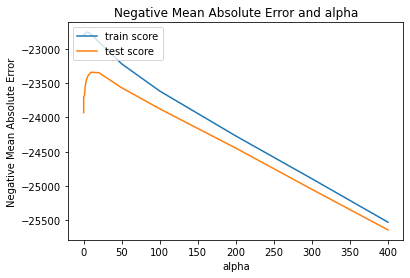

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
# Optimal Value of alpha
alpha = 25
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridge.coef_

array([26368.20523843, 13542.90673467, 11700.23652355, 30323.94649014,
        2648.74683283,  1235.86892731, 17043.29098143, 12342.73626201,
       -9102.81932241, 10352.86807203, 12736.3753079 ,  9089.72241488,
        2421.4346105 , 15755.11799442,  3816.78045253, -2989.88396665,
        9148.95359907, 11709.25734623,   850.62360547, -4193.26184061,
       -2072.29899392,  2941.86460348, 10754.34707604,  2313.86325784,
        8314.32648707])

In [87]:
# Checking important feature based on Coefficient
feature_import = pd.DataFrame({'Feature':x_train.columns,'Coeff':ridge.coef_})
feature_import.sort_values(by='Coeff', ascending=False)

,Feature,Coeff
3,GrLivArea,30323.946490
0,OverallQual,26368.205238
6,MSZoning_RL,17043.290981
13,HouseStyle_1Story,15755.117994
1,ExterQual,13542.906735
10,LandContour_Low,12736.375308
7,LotShape_IR2,12342.736262
17,Exterior1st_CemntBd,11709.257346
2,BsmtExposure,11700.236524
22,SaleType_New,10754.347076


#### Ridge-Final Evaluation 

In [88]:
# Final Validation on Test Data using R2 Score
from sklearn.metrics import r2_score
x_test = x_test[cols]
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

print('R2 Accuracy on Training(Ridge)', round(r2_score(y_train,y_train_pred),5))

print('R2 Accuracy on Test(Ridge) ', round(r2_score(y_test,y_test_pred),5))

R2 Accuracy on Training(Ridge) 0.77837
R2 Accuracy on Test(Ridge)  0.82564


# Lasso

In [89]:
# Instantiating Lasso regressor
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 7e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 200, 300, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Creating dataframe of the cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024345,0.008542,0.002400,0.003200,6e-05,{'alpha': 6e-05},-23944.501603,-22268.593414,-27074.533975,-23574.703119,-22790.899506,-23930.646323,1677.638804,31,-22439.475499,-23171.455199,-21724.004088,-23279.712090,-23385.311883,-22799.991752,632.208474
1,0.027965,0.019836,0.003924,0.006050,7e-05,{'alpha': 7e-05},-23944.501572,-22268.593293,-27074.533912,-23574.703077,-22790.899498,-23930.646271,1677.638807,30,-22439.475510,-23171.455200,-21724.004083,-23279.712066,-23385.311868,-22799.991745,632.208468
2,0.020514,0.006663,0.005524,0.005280,0.0001,{'alpha': 0.0001},-23944.501479,-22268.592932,-27074.533722,-23574.702951,-22790.899476,-23930.646112,1677.638816,29,-22439.475544,-23171.455202,-21724.004068,-23279.711993,-23385.311821,-22799.991726,632.208450
3,0.020723,0.006456,0.005316,0.003433,0.001,{'alpha': 0.001},-23944.498671,-22268.582024,-27074.528134,-23574.699188,-22790.898813,-23930.641366,1677.639128,28,-22439.476566,-23171.455270,-21724.003648,-23279.709810,-23385.310427,-22799.991144,632.207895
4,0.026813,0.014131,0.001996,0.001671,0.01,{'alpha': 0.01},-23944.470591,-22268.472542,-27074.471816,-23574.661550,-22790.892180,-23930.593736,1677.642165,27,-22439.486783,-23171.456029,-21723.999346,-23279.687975,-23385.296489,-22799.985324,632.202389


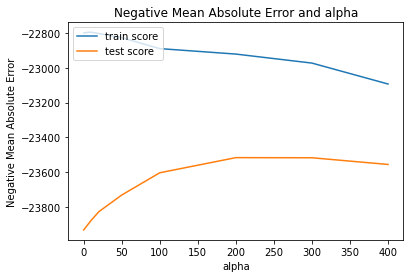

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [92]:
# Taking values of alpha very less so that I for coefficient of atleast ten featues
alpha =200
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)
lasso.coef_

array([ 26955.8201458 ,  12863.7854353 ,  11390.95132346,  30982.53374408,
            0.        ,      0.        ,  17289.16607857,  15387.89569281,
       -14958.48968183,  15931.07516006,  21535.98925027,  13119.02768343,
            0.        ,  16794.41078943,      0.        ,     -0.        ,
         9411.56547095,  13864.26985173,      0.        ,     -0.        ,
           -0.        ,      0.        ,  19836.98821778,      0.        ,
            0.        ])

In [93]:
# Checking important feature based on Coefficient
feature_import_lasso = pd.DataFrame({'Feature':x_train.columns,'Coeff':lasso.coef_})
feature_import_lasso.sort_values(by='Coeff', ascending=False)

,Feature,Coeff
3,GrLivArea,30982.533744
0,OverallQual,26955.820146
10,LandContour_Low,21535.989250
22,SaleType_New,19836.988218
6,MSZoning_RL,17289.166079
13,HouseStyle_1Story,16794.410789
9,LandContour_HLS,15931.075160
7,LotShape_IR2,15387.895693
17,Exterior1st_CemntBd,13864.269852
11,LandContour_Lvl,13119.027683


#### Lasso- Final Evaluation

In [94]:
# Final Validation on Test Data usingh R2 Score
x_test = x_test[cols]
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

print('R2 Accuracy on Training(Lasso) ', round(r2_score(y_train,y_train_pred),5))

print('R2 Accuracy on Test(Lasso) ', round(r2_score(y_test,y_test_pred),5))

R2 Accuracy on Training(Lasso)  0.78042
R2 Accuracy on Test(Lasso)  0.82639


Conclusion:
- Performed missing values treatement on both categorical and numerical field
- Dropped highly skewed columns
- Perfomed EDA on independent varialbes and also checked relationship between indepedent and dependent variables
- I did not treat outliers as we may loose important information after treating the same using capping and binning
- Use RFE to select 25 important variables
- Created MODEL using Ridge and Lasso regressor and conclused the optimal alpha for the each regressor
- The Top 5 variables for Ridge are 'GrLivArea','OverallQual','HouseStyle_1Story','LotConfig_CulDSac','BsmtQual'
- The Top 5 variables for Lasso are 'GrLivArea','OverallQual','HouseStyle_1Story','LotConfig_CulDSac','SaleType_New'